# TP2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
help(np.random.random_sample)

Help on built-in function random_sample:

random_sample(...) method of numpy.random.mtrand.RandomState instance
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    .. note::
        New code should use the ``random`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None`

In [10]:
def plot_plt(img, opencv=True):
    if len(img.shape)==3:
        if opencv:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img)
    if len(img.shape)==2:
        plt.imshow(img, cmap='gray')
    
def plot_cv2(img):
    cv2.imshow('image', img)
    # Waits for user to press any key 
    cv2.waitKey(0)
    # Closing all open windows
    cv2.destroyAllWindows() 
    
def imread(path, color_opt=cv2.IMREAD_GRAYSCALE):
    img = cv2.imread(path, color_opt)
    
    if (type(img) is np.ndarray):
        return img
    else:
        print('Error: cannot read image. Path is not correct.')
        return 0

### Lissage par moyenne et médiane

Text(0.5, 1.0, 'Filter2D')

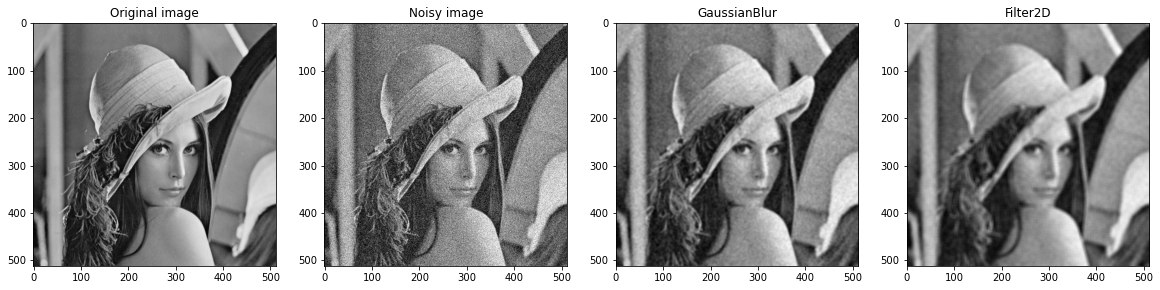

In [11]:
img_in = imread('Images/lena.png', cv2.IMREAD_GRAYSCALE)

# Create noise
noise = 30 * np.random.randn(img_in.shape[0], img_in.shape[1])
noisy_img = img_in + noise
noisy_img = np.clip(noisy_img, 0, 255)

filter_size = (9,9)

# Filter using Gaussian blur function
mean = 0
var = 0.02
blurred_img = cv2.GaussianBlur(noisy_img, filter_size, mean, var)

# Filter using Filter function
kernel = np.ones(filter_size, np.float32)
kernel = kernel / np.sum(kernel)
filtered_img = cv2.filter2D(noisy_img, -1, kernel)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.title('Original image')
plot_plt(img_in)
plt.subplot(1, 4, 2)
plot_plt(np.uint8(noisy_img))
plt.title('Noisy image')
plt.subplot(1, 4, 3)
plot_plt(np.uint8(blurred_img))
plt.title('GaussianBlur')
plt.subplot(1, 4, 4)
plot_plt(np.uint8(filtered_img))
plt.title('Filter2D')

Text(0.5, 1.0, 'Median filter applied on noisy image')

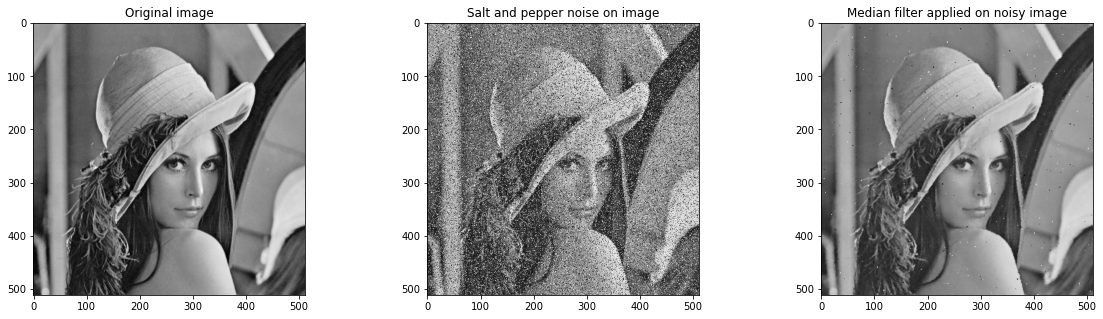

In [12]:
# Salt and pepper noise
salt_pepper_noise = np.random.random_sample(img_in.shape)
threshold = 0.1

img_sp = np.copy(img_in)
img_sp[np.where(salt_pepper_noise < threshold)] = 0
img_sp[np.where(salt_pepper_noise > 1.0 - threshold)] = 255

img_median = cv2.medianBlur(img_sp, 3)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title('Original image')
plot_plt(img_in)
plt.subplot(1, 3, 2)
plot_plt(np.uint8(img_sp))
plt.title('Salt and pepper noise on image')
plt.subplot(1, 3, 3)
plot_plt(np.uint8(img_median))
plt.title('Median filter applied on noisy image')

### Gradient par opérateur Sobel

In [13]:
def dyn_exp(img):
    img = np.double(img)
    img_min = np.min(img)
    img_max = np.max(img)
    
    img = (img - img_min) / (img_max - img_min) * 255
    
    img = np.uint8(img)

    return img

def diff(img1, img2):
    return np.sum(np.abs(img1-img2))

Sobel amplitude difference : 0.000000
Sobel angle difference     : 1350985.312734


Text(0.5, 1.0, 'Sobel edge detector : Theta')

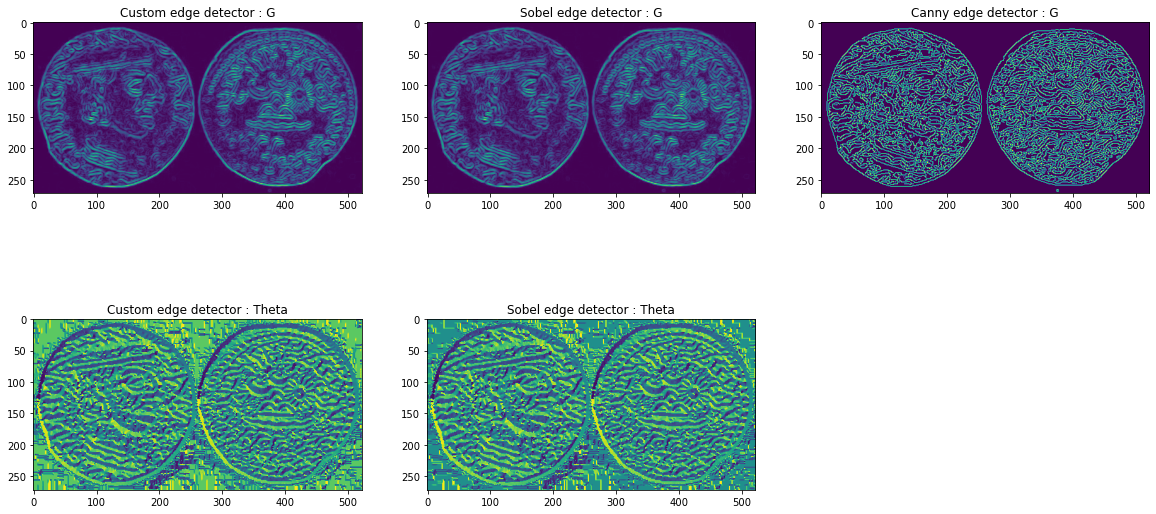

In [14]:
img = imread('Images/coins_ChastanaCoin.jpg', cv2.IMREAD_GRAYSCALE)
img = img / 255
img = np.double(img)

# Custom Sobel edge detector
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

Gx_custom = cv2.filter2D(img, -1, -kernel)
Gy_custom = cv2.filter2D(img, -1, -kernel.T)
G_custom = np.sqrt(Gx_custom**2 + Gy_custom**2)
Theta_custom = np.arctan2(Gy_custom, Gx_custom) / np.pi * 180

# Sobel
Gx_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Gy_sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
G_sobel = np.sqrt(Gx_sobel**2 + Gy_sobel**2)
Theta_sobel = np.arctan2(Gy_sobel, Gx_sobel) / np.pi * 180

# Canny
G_canny = cv2.Canny((img*255).astype(np.uint8), 20, 120)

print('Sobel amplitude difference : {0:f}'.format(diff(G_custom, G_sobel)))
print('Sobel angle difference     : {0:f}'.format(diff(Theta_custom, Theta_sobel)))

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.title('Custom edge detector : G')
plt.imshow(dyn_exp(G_custom).astype(np.uint8))
plt.subplot(2, 3, 2)
plt.imshow(dyn_exp(G_sobel).astype(np.uint8))
plt.title('Sobel edge detector : G')
plt.subplot(2, 3, 3)
plt.imshow(dyn_exp(G_canny).astype(np.uint8))
plt.title('Canny edge detector : G')
plt.subplot(2, 3, 4)
plt.imshow(dyn_exp(Theta_custom).astype(np.uint8))
plt.title('Custom edge detector : Theta')
plt.subplot(2, 3, 5)
plt.imshow(dyn_exp(Theta_sobel).astype(np.uint8))
plt.title('Sobel edge detector : Theta')